# Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [49]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Датасет состоит из 891 записи с 12 признаками.

**Описание столбцов**

- Survived: целевая переменная, указывающая, выжил ли пассажир (1 — да, 0 — нет).
- Pclass: класс билета (1-й, 2-й, 3-й).
- Sex: пол пассажира.
- Age: возраст (есть пропуски).
- SibSp: количество братьев/сестёр или супругов на борту.
- Parch: количество родителей/детей на борту.
- Ticket: номер билета.
- Fare: стоимость билета.
- Cabin: номер каюты.
- Embarked: порт посадки (C, Q, S).

In [51]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Очистка данных

## Удаление лишних стобцов

In [52]:
# Удаление стобца 'PassengerId', потому что он не несет никакой важной информации

df = df.drop(columns=["PassengerId"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Очистка пустых значений

In [54]:
# Проверка датафрейма на пропуски
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


Как мы видим в датасете очень много пропусков, попробуем заполнить их:

In [55]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-55-6e16b585ea01>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-55-6e16b585ea01>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [56]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


# Exploratory Data Analysis (EDA)

In [57]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Распределение выживаемости

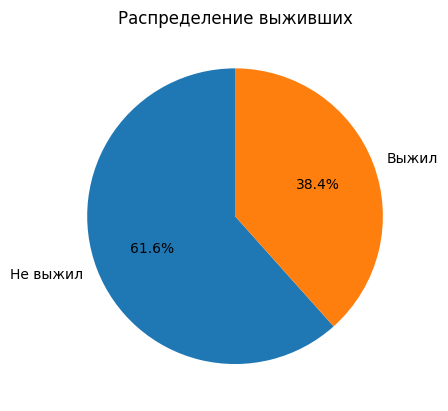

In [13]:
plt.title('Распределение выживших')

survived_labels = ['Не выжил', 'Выжил']

plt.pie(labels=survived_labels, x=df['Survived'].value_counts(), autopct='%1.1f%%', startangle=90)

plt.show()

Вывод

Большинство пассажиров не смогли выжить.

## Зависимость выживаемости от возраста

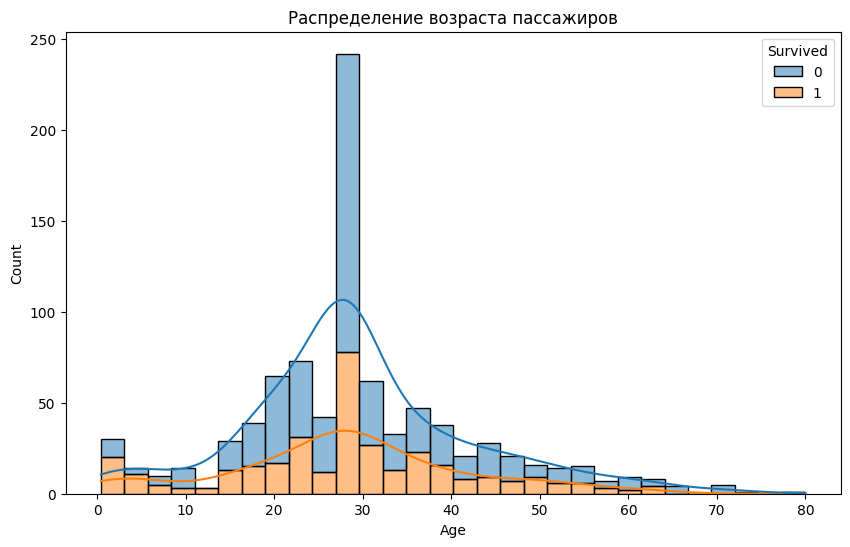

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Распределение возраста пассажиров')
plt.show()

**Вывод**

На графике видно, что большинство пассажиров были в возрасте от 20 до 40 лет, с пиком около 30 лет. Также заметно некоторое количество младенцев и детей, а пассажиры старше 60 лет встречаются реже.

## Зависимость выживаемости от пола

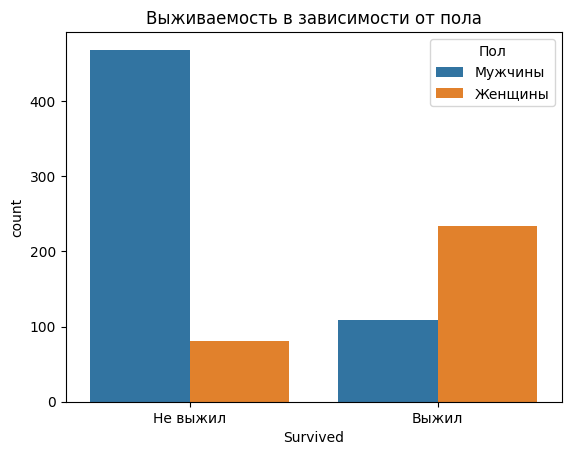

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Выживаемость в зависимости от пола')

sex_labels = ['Мужчины', 'Женщины']
plt.legend(title='Пол', labels=sex_labels)

survived_labels = ['Не выжил', 'Выжил']
plt.xticks(ticks=[0, 1], labels=survived_labels)

plt.show()

**Вывод**

Женщины имели значительно больше шансов на выживание. Большинство мужчин погибли, тогда как выживших женщин больше.

## Зависимость выживаемости от класса каюты

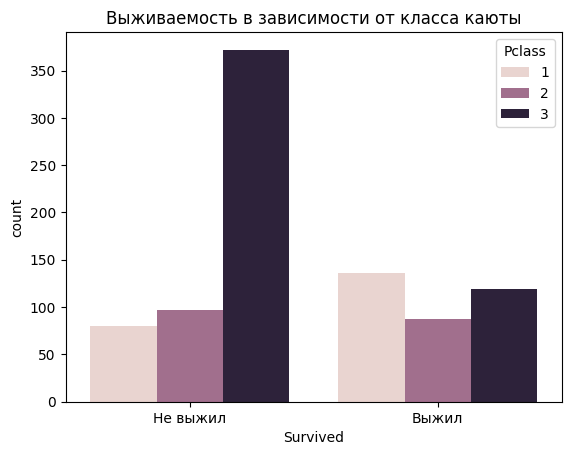

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Выживаемость в зависимости от класса каюты')

survived_labels = ['Не выжил', 'Выжил']
plt.xticks(ticks=[0, 1], labels=survived_labels)

plt.show()

**Вывод**

Видно, что пассажиры третьего класса имеют наибольшее количество погибших (не выжили), тогда как выжившие в основном были из первого класса. Пассажиры второго класса также распределены, но их значительно меньше по сравнению с третьим классом.

## Зависимость выживаемости от размера семьи

In [17]:
# Создание нового признака 'FamilySize' на основе количества родственников
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

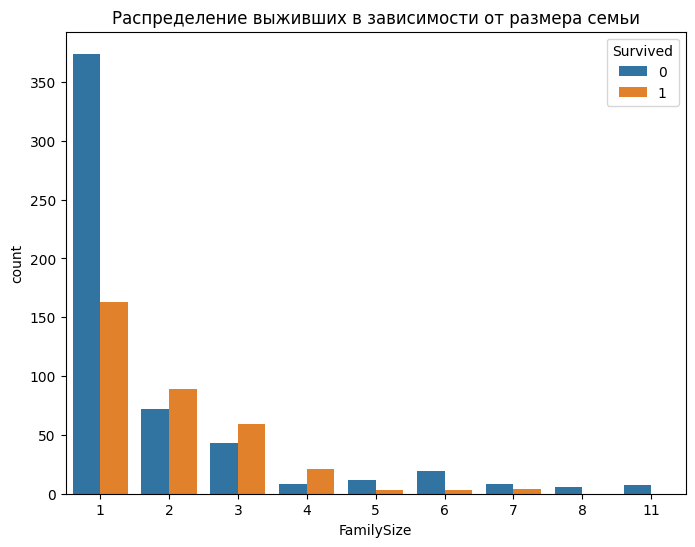

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Распределение выживших в зависимости от размера семьи')
plt.show()

In [19]:
df = df.drop(columns=['FamilySize'])

**Вывод**

Размер семьи может оказывать значительное влияние на выживаемость. Этот фактор может быть связан с тем, как во время катастрофы организовывалось спасение, а также с тем, как пассажиры помогали друг другу. Меньшие семьи имели больше шансов на спасение.

## Зависимость выживаемости от цены билета

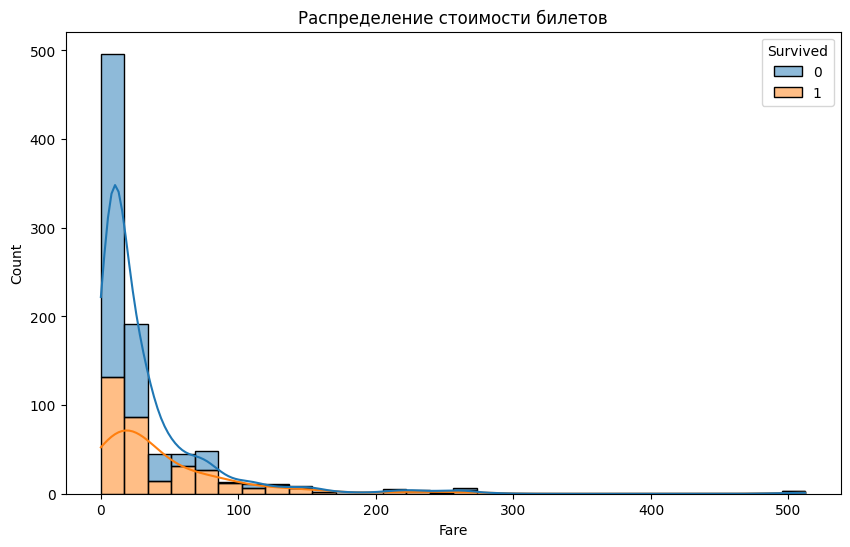

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Распределение стоимости билетов')
plt.show()

**Вывод**

* Низкие цены: видно, что количество погибших значительно превышает количество
выживших. Это может указывать на то, что пассажиры с низкими ценами билетов (возможно, из низших классов) имели меньшие шансы на выживание.

* Средние: выжившие составляют значительную часть. Особенно заметно, что среди пассажиров, заплативших высокие цены, гораздо больше выживших, что может указывать на то, что более состоятельные пассажиры, скорее всего, находились в лучших условиях и имели больше шансов на спасение.

* Высокие цены: График может также показывать, что пассажиры с очень высокими ценами билетов (например, выше 100) имели вероятность выживания 50 на 50.

## Зависимость выживаемости от палубы

In [23]:
# Извлечение палубы из номера каюты
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

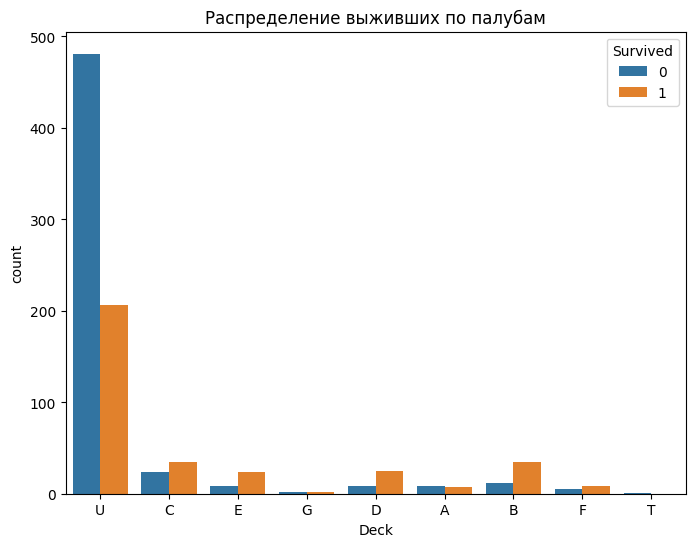

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Deck', hue='Survived', data=df)
plt.title('Распределение выживших по палубам')
plt.show()

In [25]:
df = df.drop(columns=['Deck'])

**Вывод**

* 1,3,4 - высокая выживаемость, преобладает над погибшими. Пассажиры, находившиеся на этих палубах, скорее всего, имели более легкий доступ к спасательным шлюпкам и, возможно, находились в лучших условиях.

* 2, 5 - значительное количество выживших.

* 6 - 50/50

* 0, 7, 8 - Это может быть связано с тем, что эти палубы были расположены ниже и имели меньший доступ к спасательным шлюпкам.

# Feature engineering

In [60]:
# Извлечение титула из имени
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [61]:
# Создание нового признака 'FamilySize' на основе количества родственников
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [62]:
# Создание нового признака 'IsAlone', показывает, если человек был один
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [63]:
# Извлечение префикса билета
df['TicketPrefix'] = df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'None')

In [64]:
# Извлечение палубы из номера каюты
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

In [65]:
# Создание признака возрастных групп
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [66]:
# Изменение пустых значений "Cabin" на 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-66-e6c7f4cd2bfc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


In [67]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         891 non-null    object  
 10  Embarked      891 non-null    object  
 11  Title         891 non-null    object  
 12  FamilySize    891 non-null    int64   
 13  IsAlone       891 non-null    int64   
 14  TicketPrefix  891 non-null    object  
 15  Deck          891 non-null    object  
 16  AgeGroup      891 non-null    category
dtypes: category(1), float64(2), int64(6), object(8)
memory

# Исправление типов

In [69]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [70]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'TicketPrefix',
       'Deck', 'AgeGroup'],
      dtype='object')

In [71]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [72]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix,Deck,AgeGroup
0,0,3,108,1,22.0,1,0,523,7.2500,147,2,12,2,0,4,8,4
1,1,1,190,0,38.0,1,0,596,71.2833,81,0,13,2,0,18,2,0
2,1,3,353,0,26.0,0,0,669,7.9250,147,2,9,1,1,37,8,4
3,1,1,272,0,35.0,1,0,49,53.1000,55,2,13,2,0,16,2,4
4,0,3,15,1,35.0,0,0,472,8.0500,147,2,12,1,1,16,8,4


# Эксперименты с моделями

## Определение метрик

* Accuracy (Точность) - измеряет долю правильно предсказанных наблюдений среди всех наблюдений.

* Precision (Точность классификации для положительного класса) - показывает, какая доля объектов, предсказанных как положительные, действительно являются положительными.

* Recall (Полнота) - измеряет, какая доля объектов, которые действительно принадлежат к положительному классу, была правильно предсказана.

* F1-score (Среднегармоническое Precision и Recall) - объединяет Precision и Recall в одно число, вычисляя их среднегармоническое.

## Разделение данных на обучающую и тестовую выборки

In [79]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Создание модели

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU
from keras.regularizers import l1_l2

# Создание модели
model = Sequential()

# Первый слой
model.add(Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Умеренный Dropout

# Второй слой
model.add(Dense(128, kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Третий слой
model.add(Dense(64, kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

# Выходной слой
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## Компиляция модели

In [81]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

## Тренировка модели

In [82]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Используем EarlyStopping и ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Обучение модели
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),
                    batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5992 - loss: 17.3304 - val_accuracy: 0.7598 - val_loss: 16.3277 - learning_rate: 5.0000e-04
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7236 - loss: 15.9997 - val_accuracy: 0.7430 - val_loss: 15.1926 - learning_rate: 5.0000e-04
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7536 - loss: 14.9092 - val_accuracy: 0.7374 - val_loss: 14.1158 - learning_rate: 5.0000e-04
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8084 - loss: 13.7336 - val_accuracy: 0.7598 - val_loss: 13.0890 - learning_rate: 5.0000e-04
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 12.7677 - val_accuracy: 0.7709 - val_loss: 12.1020 - learning_rate: 5.0000e-04
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7896 - loss: 11.8022 - val_accuracy: 0.7542 - val_loss: 11.1777 - learning_rate: 5.0000e-04
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accu

## Оценивани модели

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.5748 
Точность модели на тестовых данных: 79.89%


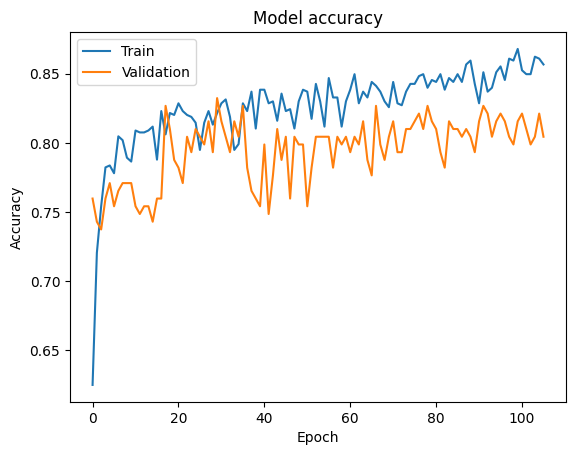

In [83]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность модели на тестовых данных: {test_accuracy*100:.2f}%")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

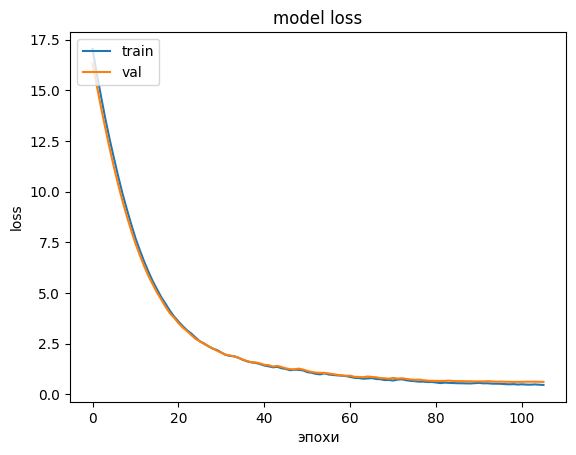

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('эпохи')
plt.legend(loc='upper left')
plt.show()

In [85]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_classes))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**Вывод**

* График точности (Model accuracy):

 * Тренировочная точность постепенно растет и стабилизируется на уровне около 85-86%.
 * Валидационная точность демонстрирует значительные колебания на протяжении всех эпох, что может указывать на переобучение модели. В конце графика она достигает уровня около 80%.
 * Разрыв между кривыми тренировки и валидации говорит о том, что модель адаптировалась к тренировочным данным лучше, чем к валидационным.

* График ошибки (Model loss):

 * Обе кривые — train и val — показывают уверенное снижение функции потерь, приближаясь к нулю к концу обучения. Разница между ними минимальна, что свидетельствует об успешном снижении ошибки и согласованности обучения.
 * Однако из-за колебаний на графике точности вероятно, что модель слегка переобучается.

* Метрики на тестовых данных:

 * Общая точность (Accuracy): 79.89% — это приемлемый результат, но есть пространство для улучшений.
 * Precision, Recall и F1-score:
   * Для класса 0 (105 объектов) модель показывает precision 82% и recall 85%, что указывает на хорошее качество предсказаний.
   * Для класса 1 (74 объекта) precision 77% и recall 73%, что хуже по сравнению с первым классом. Это может быть связано с несбалансированностью данных или сложностью распознавания класса 1.

-> **Попробуем применить кросс-валидацию.**

## Применение кросс-валидации

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Параметры кросс-валидации
k_folds = 3
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Списки для хранения метрик
reports = []
conf_matrices = []

for fold, (train_index, val_index) in enumerate(skf.split(X_scaled, y), 1):
    # Разделяем данные для текущего фолда
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Обучение модели на тренировочном фолде
    model.fit(X_train_fold, y_train_fold, epochs=500, validation_data=(X_val_fold, y_val_fold),
                   batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

    # Предсказание на валидационном наборе
    y_val_pred = (model.predict(X_val_fold) > 0.5).astype(int)

    # Генерация отчета классификации и матрицы ошибок
    report = classification_report(y_val_fold, y_val_pred, output_dict=True)
    reports.append(report)

    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    conf_matrices.append(conf_matrix)

    print(f"Fold {fold} Classification Report:")
    print(classification_report(y_val_fold, y_val_pred))
    print(f"Fold {fold} Confusion Matrix:\n{conf_matrix}\n")

# Итоговая матрица ошибок (среднее значение)
conf_matrix_sum = sum(conf_matrices)

# Вывод финального отчета по матрице ошибок
tn, fp, fn, tp = conf_matrix_sum.ravel()
print("Итоговая матрица ошибок:")
print(f"True Negatives (TN): {tn} - Модель предсказала, что не выживет, и по факту не выжил")
print(f"False Positives (FP): {fp} - Модель предсказала, что не выживет, но по факту выжил")
print(f"False Negatives (FN): {fn} - Модель предсказала, что выживет, но по факту не выжил")
print(f"True Positives (TP): {tp} - Модель предсказала, что выживет, и по факту выжил\n")

# Итоговый вывод о проделанной работе
print("Окончательный вывод:")
print("Модель после кросс-валидации показывает такие результаты:")
print(f"Средняя точность: {np.mean([report['accuracy'] for report in reports]) * 100:.2f}%")
print(f"Среднее значение метрики F1 для выживших: {np.mean([report['1']['f1-score'] for report in reports]):.2f}")
print(f"Среднее значение метрики F1 для погибших: {np.mean([report['0']['f1-score'] for report in reports]):.2f}")


Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8789 - loss: 0.4766 - val_accuracy: 0.8788 - val_loss: 0.4572 - learning_rate: 3.1250e-05
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8496 - loss: 0.5112 - val_accuracy: 0.8788 - val_loss: 0.4564 - learning_rate: 3.1250e-05
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8277 - loss: 0.5291 - val_accuracy: 0.8721 - val_loss: 0.4555 - learning_rate: 3.1250e-05
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8115 - loss: 0.5233 - val_accuracy: 0.8721 - val_loss: 0.4559 - learning_rate: 3.1250e-05
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8492 - loss: 0.4923 - val_accuracy: 0.8788 - val_loss: 0.4540 - learning_rate: 3.1250e-05
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8224 - loss: 0.5278 - val_accuracy: 0.8822 - val_loss: 0.4528 - learning_rate: 3.1250e-05
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8506 

Выводы по фолдам

1. Fold 1

* Точность (accuracy): 88%
* Precision и Recall:
 * Класс 0: Precision — 0.90, Recall — 0.91
 * Класс 1: Precision — 0.86, Recall — 0.83
* Особенности:
Модель хорошо справляется с распознаванием погибших (класс 0), но имеет небольшие пропуски среди выживших (FN = 19).


2. Fold 2

* Точность (accuracy): 85%
* Precision и Recall:
 * Класс 0: Precision — 0.84, Recall — 0.94
 * Класс 1: Precision — 0.88, Recall — 0.71
* Особенности:
В этом фолде модель продемонстрировала высокий Recall для погибших, но существенно просела на Recall для выживших. Много выживших были ошибочно классифицированы как погибшие (FN = 33).


3. Fold 3

* Точность (accuracy): 87%
* Precision и Recall:
 * Класс 0: Precision — 0.87, Recall — 0.92
 * Класс 1: Precision — 0.86, Recall — 0.78
* Особенности:
Модель снова показала стабильное качество для погибших, но Recall для выживших (FN = 25) остаётся ниже ожидаемого.

**Общий вывод по модели**

1. Средняя точность модели составляет 86.64%, что является хорошим результатом и подтверждает стабильность модели на разных подмножествах данных.

2. Качество предсказаний по классам:

 * Класс 0 (не выжили):
    * Средняя точность (precision) высокая — около 0.87–0.90.
    * Recall также высокий — модель хорошо распознает тех, кто не выжил, с минимальным числом ошибок (FN).
    * Средний F1-score: 0.90, что свидетельствует о хорошем балансе между precision и recall для этого класса.
 * Класс 1 (выжили):
    * Средняя точность (precision) составляет около 0.86.
    * Recall ниже, около 0.77–0.83, что говорит о том, что модель иногда ошибочно предсказывает "не выжил" для выживших (FP).
    * Средний F1-score: 0.82, что несколько ниже по сравнению с классом 0, но всё ещё приемлемо.

3. Матрица ошибок (суммарная):

 * True Negatives (TN): 507 — Модель уверенно предсказывает "не выжил" с высокой точностью.
 * False Positives (FP): 42 — Небольшая часть выживших ошибочно определена как "не выжил".
 * False Negatives (FN): 77 — Случаи, когда модель ошибочно предсказала "выживет" для погибших, составляют основной источник ошибок для класса 1.
 * True Positives (TP): 265 — Большинство выживших определяются корректно.

# Вывод

Проведенная работа показала, что итоговая модель демонстрирует высокий уровень производительности при решении задачи предсказания выживаемости. Модель обладает хорошей точностью, особенно для класса погибших, что делает её надежной для задач, где критически важно минимизировать ошибки. Однако заметное количество False Negative ошибок указывает на необходимость улучшения модели, чтобы повысить полноту предсказаний для выживших.

---

**Достигнуты следующие результаты:**

* Проведена оценка нескольких моделей и выбрана наилучшая из них.
* Выполнена трехфолдовая кросс-валидация для всесторонней оценки качества модели.
* Проанализированы типы ошибок и выявлены направления для дальнейшего улучшения.

---
**Заключение:**
Полученная модель показала стабильные результаты на кросс-валидации, подтверждая свою способность предсказывать с высокой точностью. Она особенно хорошо справляется с классификацией погибших, однако требует доработки для уменьшения количества пропущенных выживших (FN). В дальнейшем рекомендуется сосредоточиться на улучшении Recall для выживших, чтобы повысить баланс между точностью и полнотой предсказаний.